Import two Excel columns from extracts containing special characters and spaces.

Quickly clean the columns and compare them to ensure they are identical.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("comparatif_raw_data.xlsx")
df.head(10)

,col1,col2
0,93000,"93 000,00"
1,"9 652,5","9 652,5"
2,9 120,"9 120,00"
3,9 100,"9 100,00"
4,8 832,"8 832,00"


In [3]:
print(df.describe())
print("-"*30)
print(df.info())

         col1      col2
count     107       107
unique     93        93
top     3 000  3 000,00
freq        4         4
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   col1    107 non-null    object
 1   col2    107 non-null    object
dtypes: object(2)
memory usage: 1.8+ KB
None


In [4]:
# Fonction pour nettoyer et convertir les chaînes en float
def clean_and_convert(value):
    # Vérifiez si la valeur est une chaîne de caractères
    if isinstance(value, str):
        value = (
            value.replace('\u202f', '')  # Supprime les espaces insécables
                 .replace(' €', '')  # Supprime le signe euro
                 .replace(',', '.')  # Remplace la virgule par un point
                 .replace(' ', '')  # Supprime les espaces restants
        )
    return float(value)

In [6]:
# Appliquer la fonction à chaque colonne
df['col1'] = df['col1'].apply(clean_and_convert)
df['col2'] = df['col2'].apply(clean_and_convert)

# Afficher les statistiques descriptives après conversion
print(df.describe())

               col1          col2
count    107.000000    107.000000
mean    8944.111621   8944.111682
std    14664.851691  14664.851711
min       33.600000     33.600000
25%      704.000000    704.000000
50%     3000.000000   3000.000000
75%     8414.100000   8414.100000
max    93000.000000  93000.000000


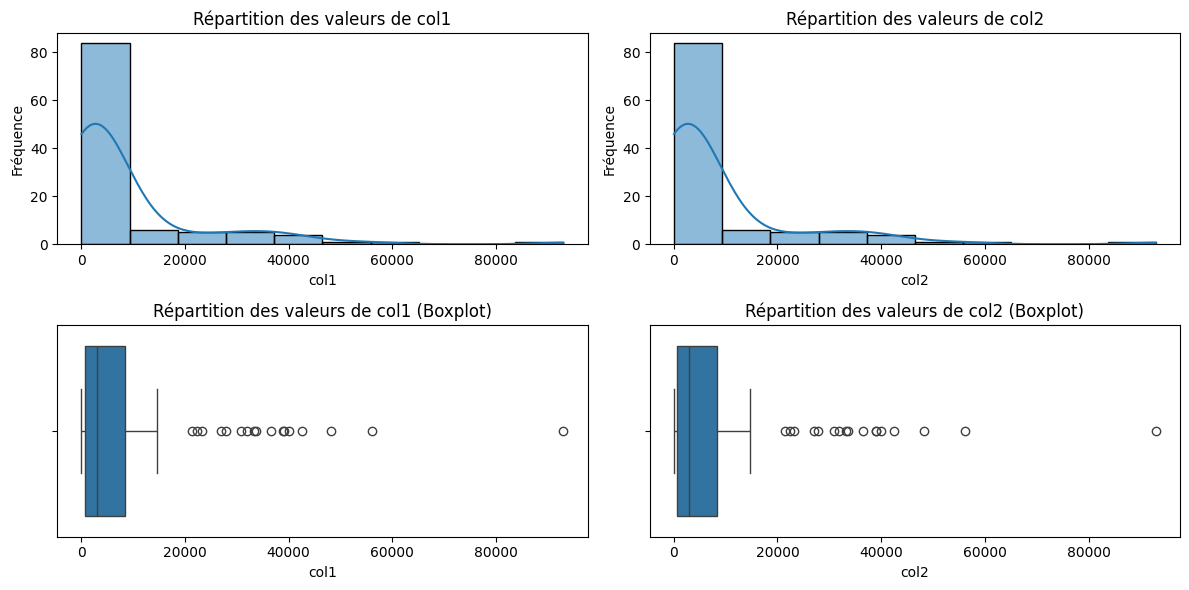

In [7]:
# Plot les 2 colonnes

# Fonds de couleur pour les graphiques
plt.figure(figsize=(12, 6))

# Afficher un histogramme des valeurs de 'E_MOIS' avec seaborn 
plt.subplot(2, 2, 1)
sns.histplot(df['col1'], kde=True, bins=10)
plt.xlabel('col1')
plt.ylabel('Fréquence')
plt.title('Répartition des valeurs de col1')
# Afficher un histogramme des valeurs de 'DAD' avec seaborn 
plt.subplot(2, 2, 2)
sns.histplot(df['col2'], kde=True, bins=10)
plt.xlabel('col2')
plt.ylabel('Fréquence')
plt.title('Répartition des valeurs de col2')

# Afficher un boxplot des valeurs de 'DAD_' avec seaborn
plt.subplot(2, 2, 4)
sns.boxplot(x=df['col2'])
plt.xlabel('col2')
plt.title('Répartition des valeurs de col2 (Boxplot)')
# Afficher un boxplot des valeurs de 'E_MOIS' avec seaborn
plt.subplot(2, 2, 3)
sns.boxplot(x=df['col1'])
plt.xlabel('col1')
plt.title('Répartition des valeurs de col1 (Boxplot)')

plt.tight_layout()
plt.show()

plt.subplot(3, 1, 1) signifie :

* nrows = 3 : La grille a 3 lignes.
* ncols = 1 : La grille a 1 colonne.
* index = 1 : Le sous-graphique se trouve à la première position (première ligne, première colonne).

In [8]:
# fonction de check des 2 colonnes :
def is_equal(row):
    if row['col1'] == row['col2']:
        return True
    else:
        return False
    

df["check"] = df.apply(is_equal, axis=1)

In [12]:
print(df.head())
#print (df["check"].value_counts())
print(df["check"].value_counts(normalize=True))

      col1     col2  check
0  93000.0  93000.0   True
1   9652.5   9652.5   True
2   9120.0   9120.0   True
3   9100.0   9100.0   True
4   8832.0   8832.0   True
check
True     0.953271
False    0.046729
Name: proportion, dtype: float64


In [ ]:
# réexport vers excel pour vérification
df.to_excel("compare A and B cleaned.xlsx", index=False)